**What is Exploratory Data Analysis (EDA)?**

- Exploratory Data Analysis (EDA) is a crucial initial step in data science projects. It involves analyzing and visualizing data to understand its key characteristics, uncover patterns, and identify relationships between variables refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables. EDA is normally carried out as a preliminary step before undertaking extra formal statistical analyses or modeling.

**Importing Important Libraries**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**The Data**

Lets start by reading in titanic_train.csv file into Pandas Dataframe

In [30]:
train = pd.read_csv(r"C:\\Users\\Krishna Baraskar\\Downloads\\titanic_train.csv")

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Exploratory Data Analysis**

Lets begin some exploratory data Analysis! We'll start by cheking out missing data!

**Missing Data**

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


`We can use seaborn to create a simple heatmap to see where we are missing data!`

<Axes: >

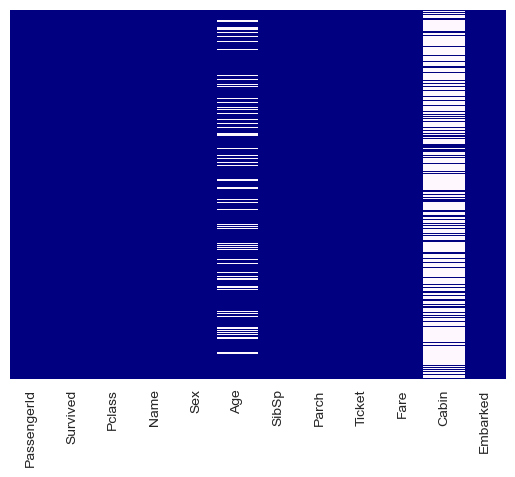

In [34]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="gist_ncar")

In [35]:
missing_values = (train.isnull().sum()/len(train))*100
missing_values = missing_values.round(2)
missing_values

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

`Hardly 20% of the age of data is missing. The proportion of Age missing is likey small enough for reasonable replacement with some form of imutation. looking at the Cabin column it k=look like we are just missing too much of that data to do somthing usefull with at a basic level We"ll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"`

Q. How many People are Survived?

In [36]:
Survived_People = train["Survived"].value_counts()
Survived_People

Survived
0    549
1    342
Name: count, dtype: int64

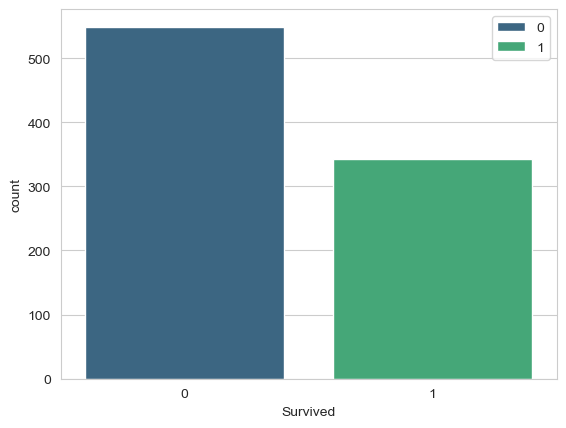

In [37]:
# Checking the Survived data

sns.set_style("whitegrid")
sns.countplot(x = "Survived",hue="Survived", data = train,palette="viridis")
plt.legend(loc = "best")
plt.show()

Q. How many male & female survived

In [38]:
train.groupby(by = "Sex").Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

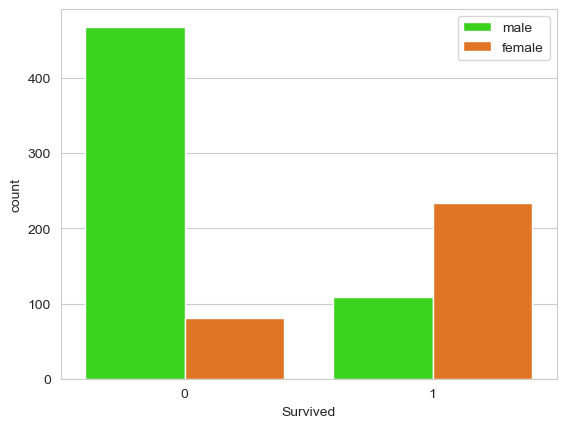

In [39]:
sns.countplot(x = "Survived",hue="Sex", data = train,palette="gist_ncar")
plt.legend(loc = "best")
plt.show()

Q. How many People are survived from the Passenger Class?

In [40]:
train.groupby(by="Pclass").Survived.sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

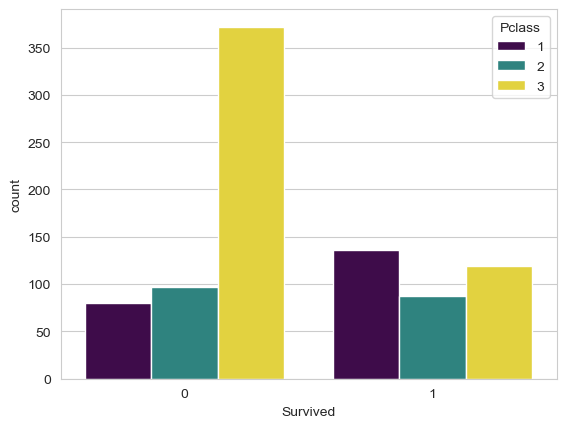

In [41]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived",hue = "Pclass",data = train,palette = "viridis")

Q. Distribution by the age?

In [42]:
train["Age"].value_counts().sort_values(ascending=False).head(10)

Age
24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
Name: count, dtype: int64

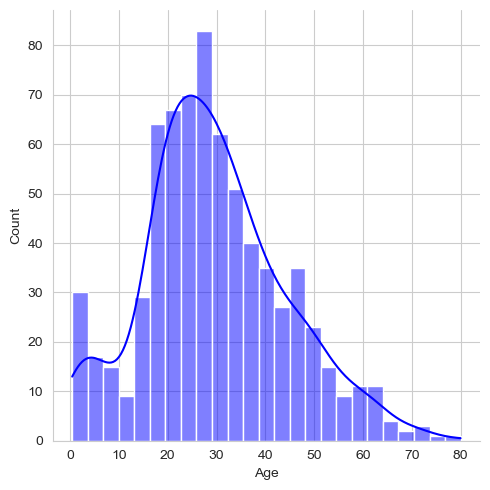

In [43]:
sns.displot(train["Age"].dropna(),kde = True,color = "blue",bins=25)
plt.show()

Q. Siblings and Spouses with person

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


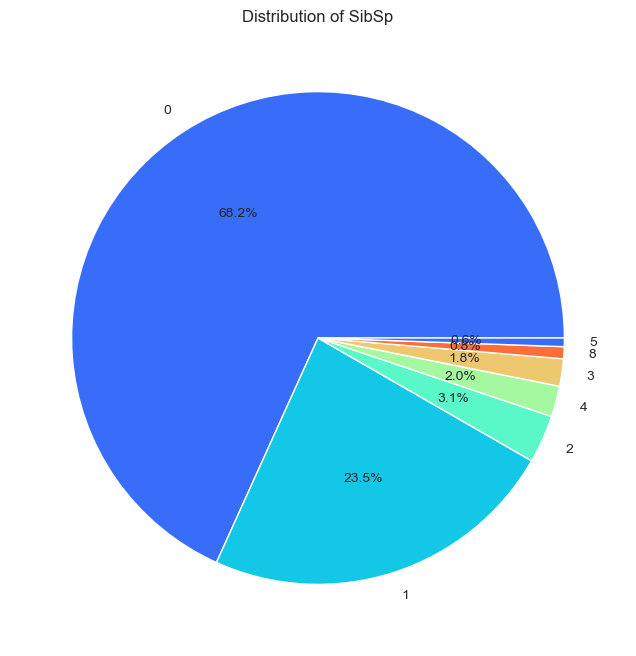

In [44]:
SibSp_count = train["SibSp"].value_counts()

print(SibSp_count)

plt.figure(figsize=(8,8))

plt.pie(x=SibSp_count, labels=SibSp_count.index, autopct="%1.1f%%", colors=sns.color_palette("rainbow"))
plt.title('Distribution of SibSp')

plt.show()

<Axes: >

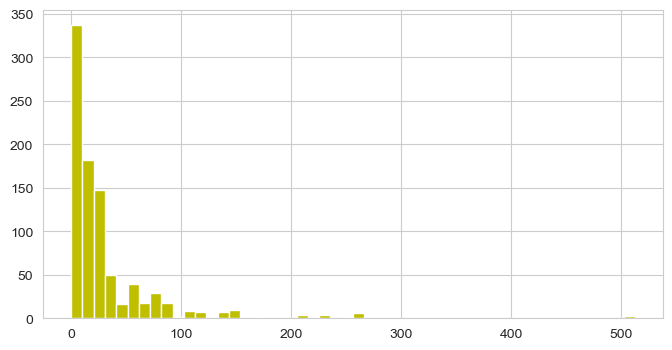

In [45]:
train["Fare"].hist(color = "y",bins = 50,figsize=(8,4))

**Data Cleaning**

`We want to fill in missing age data instead of just droping the missing rows. One way to do this is by filling in the mean age of all  the pasengers. however we can be smarter about this and check the average age by passenger class.`

In [46]:
train.groupby(by="Pclass").Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

<Axes: xlabel='Pclass', ylabel='Age'>

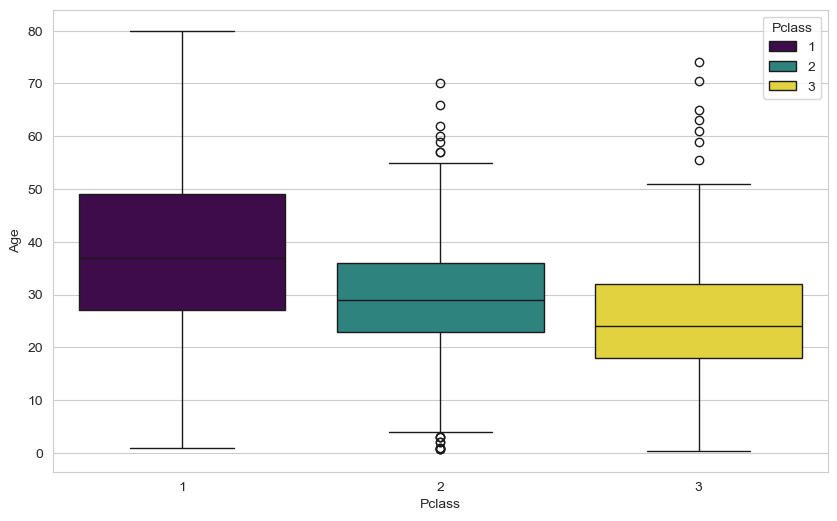

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "Pclass",y = "Age",hue = "Pclass",data = train,palette="viridis")

In [48]:
def Input_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [49]:
train["Age"] = train[["Age","Pclass"]].apply(Input_age,axis = 1)

C:\Users\Krishna Baraskar\AppData\Local\Temp\ipykernel_11852\252523819.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Krishna Baraskar\AppData\Local\Temp\ipykernel_11852\252523819.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

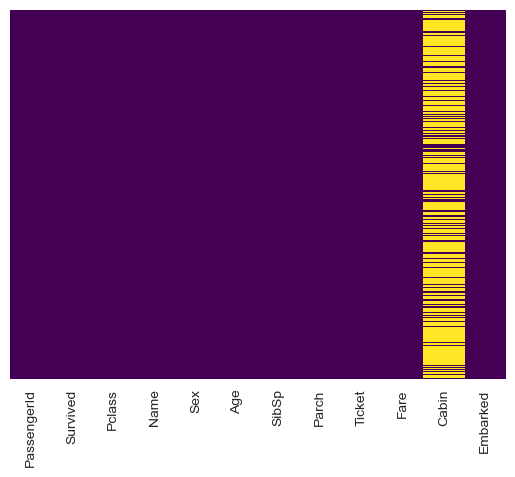

In [50]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

`Lets! Drop the Cabin column and Embarked that in NaN`

In [51]:
train.drop("Cabin",axis=1,inplace=True)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [54]:
train.fillna(method="bfill",axis=0,inplace=True)

C:\Users\Krishna Baraskar\AppData\Local\Temp\ipykernel_11852\1989053925.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train.fillna(method="bfill",axis=0,inplace=True)


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
